In [6]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input

# Load DataSet

In [13]:
X_train = np.loadtxt('../DataSet/input.csv',delimiter=',')
Y_train = np.loadtxt('../DataSet/labels.csv',delimiter=',')

X_test = np.loadtxt('../DataSet/input_test.csv',delimiter=',')
Y_test = np.loadtxt('../DataSet/labels_test.csv',delimiter=',')

In [17]:
print("X_train shape",X_train.shape)
print("y_train shape",Y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",Y_train.shape)

X_train shape (2000, 30000)
y_train shape (2000,)
X_test shape (400, 30000)
y_test shape (2000,)


In [18]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

#Making X_train and X_test between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0


In [19]:
print("X_train shape",X_train.shape)
print("y_train shape",Y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",Y_test.shape)

X_train shape (2000, 100, 100, 3)
y_train shape (2000, 1)
X_test shape (400, 100, 100, 3)
y_test shape (400, 1)


In [20]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

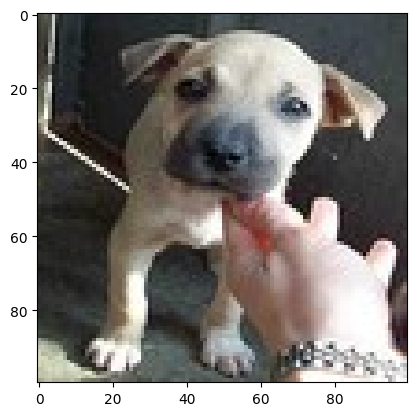

In [22]:
import random

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model Implemenation

In [23]:
model = Sequential([
    Input(shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
#another way using add function
model = Sequential()

model.add( Input(shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy' ,optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(X_train,Y_train,epochs=7, batch_size=64)

Epoch 1/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6786 - loss: 0.5904 
Epoch 2/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7164 - loss: 0.5631 
Epoch 3/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7684 - loss: 0.4930
Epoch 4/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8011 - loss: 0.4395
Epoch 5/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8180 - loss: 0.4069
Epoch 6/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.8544 - loss: 0.3344
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8630 - loss: 0.3186


In [40]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6835 - loss: 0.6011


[0.6099625825881958, 0.6775000095367432]

# Making predictions

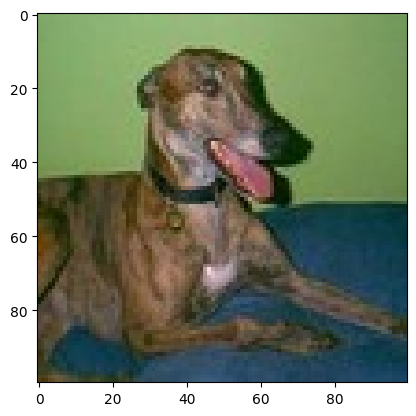

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Our model says it is a :  Dog


In [41]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))

y_pred = y_pred > 0.5
if (y_pred == 0):
    pred = "Dog"
else :
    pred = "Cat"

print("Our model says it is a : ",pred)

In [43]:
model.save("model.h5")
